# Problems, Chapter 2

### 1.) Solve the game with matrix $\begin{pmatrix} -1 & -3 \\ -2 & 2\end{pmatrix}$, that is find the value and an optimal mixed strategy for both players.

*Solution:* The matrix has no saddle points. From the formulas $$p = \frac{c-d}{(a-b)+(c-d)}, \quad q = \frac{c-b}{a-b+c-d}, \quad v = \frac{ac-bd}{a-b+c-d},$$ we have:

In [2]:
A = [[-1, -3], [-2, 2]]
# Recall A = [[a,b],[d,c]]


def solve_2x2(A):
    def p(A):
        return (A[1][1]-A[1][0])/(A[0][0]-A[0][1]+A[1][1]-A[1][0])
    def q(A):
        return (A[1][1]-A[0][1])/(A[0][0]-A[0][1]+A[1][1]-A[1][0])
    def v(A):
        return (A[0][0]*A[1][1]-A[0][1]*A[1][0])/(A[0][0]-A[0][1]+A[1][1]-A[1][0])
    print("Optimal probability player I choses row 1: " + str(p(A)))
    print("Optimal probability player II choses row 2: " + str(q(A)))
    print("Value of " + str(A) +": " + str(v(A)))

solve_2x2(A)

Optimal probability player I choses row 1: 0.6666666666666666
Optimal probability player II choses row 2: 0.8333333333333334
Value of [[-1, -3], [-2, 2]]: -1.3333333333333333



------------------
### 2.) Solve the game with matrix $\begin{pmatrix} 0 & 2\\ t & 1 \end{pmatrix}$ for an arbitrary real number $t$. (Don't forget to check for a saddle point!) Draw the graph of $v(t)$, the value of the game, as a function of $t$, of $-\infty < t < \infty$.

*Solution:* If $t$ is a saddle point, then $t$ is the minimum of the second row and maximum of the first column. Hence, we must have that $t \leq 1$ and $t \geq 0$. Then for $0 \leq t \leq 1$, we have that $v(t) = t$, and the optimal strategy for player 1 is to always play the second row ($p=0$) and the optimal strategy for player II is to always play the first column ($q=1$).

If $t \leq 0$, then $0$ is the minimum of the first row and the maximum of the first column, and the point $(1,1)$ is a saddle point, so that $v(t<0)=0.

Otherwise, the probabilities are:

$$ p = \frac{1-t}{-2+1-t} = \frac{1-t}{-1-t}, \quad q= \frac{-1}{-1-t}, \quad v = \frac{-2t}{-1-t} $$

hence, we have


In [3]:
import numpy as np
import matplotlib.pyplot as plt

t_lt0 = np.linspace(-5,0,num=100)
t_0to1 = np.linspace(0, 1, num=100)
t_gt1= np.linspace(1,5, num=100)

plt.plot(t_lt0, np.full([100,1],0), t_0to1, t_0to1, t_gt1, -2*t_gt1/(-1-t_gt1))


-----------------------------------------
### 3.) Show that if a game with $m \times n$ matrix has two saddle points, then they have equal value.

If the saddle points exist in the same row or column, then it is obvious that the saddle points must be equal. Thus, suppose they do not; suppose that $a_{ij}$ and $a_{xy}$ are saddle points, with $x \neq i$ and $y \neq j$.

It must be that $a_{ij}$ is the maximum of all values in the $j$th column. Specifically, $a_{ij} \geq a_{xj}.$ In addition, $a_{ij}$ must be the minimum of all values in the $i$th row, so that $a_{ij} \leq a_{iy}$.

But $a_{xy}$ is also a saddle point, so we have $a_{xy} \geq a_{iy}$ (that is, $a_{xy}$ is the maximum of the $y$th column) and $a_{xy} \leq a_{xj}$. Combining, we have

$$a_{xy} \leq a_{xj} \leq a_{ij} \leq a_{iy} \leq a_{xy}$$

so that $a_{xy} = a_{ij}$.

------------
### 4.) Reduce by dominance to 2 $\times$ 2 games and solve:
$$(a) \quad \begin{pmatrix}5 & 4 & 1 & 0 \\ 4 & 3 & 2 & -1 \\ 0 & -1 & 4 & 3\\ 1 & -2 &1 &2 \end{pmatrix} \qquad (b) \quad \begin{pmatrix} 10 & 0 & 7 & 1 \\ 2 & 6 & 4 & 7 \\ 6 & 3 & 3 & 5 \end{pmatrix}$$

For $(a)$, the second column dominates the first, so that we obtain $$A = \begin{pmatrix} 4&1&0\\3&2&-1\\-1&4&3\\-2&1&2 \end{pmatrix}$$

Then the fourth row is dominated by the third, so that $$A = \begin{pmatrix} 4 & 1 & 0 \\ 3 & 2 &-1 \\-1 & 4 & 3 \end{pmatrix}$$

The third column now dominates the second: $$ A = \begin{pmatrix}4 & 0 \\ 3 & -1 \\ -1 & 3 \end{pmatrix}$$ 

And finally, the first row dominates the second: 

$$A = \begin{pmatrix}4 & 0 \\ -1 & 3 \end{pmatrix}.$$

There are no saddle points. Thus, we have

In [4]:
A = [[4,0],[-1,3]]
solve_2x2(A)

Optimal probability player I choses row 1: 0.5
Optimal probability player II choses row 2: 0.375
Value of [[4, 0], [-1, 3]]: 1.5


Which corresponds to a strategy for I of $(1/2,0,1/2,0)$ and a strategy for II of $(0,3/8,0,5/8)$.

For $(b)$, the second column dominates the fourth: $$B= \begin{pmatrix}10 & 0 & 7\\2&6&4\\6& 3 & 3 \end{pmatrix}$$

Now $1/2*R_1+1/2*R_2 \geq R_3$, so row 3 is dominated: $$B= \begin{pmatrix}10&0&7\\2&6&4 \end{pmatrix}.$$

Now, $1/2*C_1+1/2*C_2 \leq C_3$, so column 3 is  dominated, and $$B= \begin{pmatrix} 10 & 0 \\ 2 & 6 \end{pmatrix}.$$

$B$ does not haev a saddle point, and thus we have

In [5]:
B = [[10,0],[2,6]]
solve_2x2(B)

Optimal probability player I choses row 1: 0.2857142857142857
Optimal probability player II choses row 2: 0.42857142857142855
Value of [[10, 0], [2, 6]]: 4.285714285714286


Which corresponds to a strategy of $(2/7,5/7, 0,0)$ for I, a strategy of $(3/7,4/7,0)$ for II, and a value of $30/7$

-----------
### 5.) Solve the game with matrix $\begin{pmatrix} 3 & 2 & 4 & 0 \\ -2 & 1 & -4 & 5 \end{pmatrix}$. Reduce by dominance to a 3 $ \times$ 2 matrix game and solve: $\begin{pmatrix} 0 & 8 & 5 \\ 8 & 4 & 6 \\ 12 & -4 & 3 \end{pmatrix}$

We can see that the payoff when I chooses row 1 with probability $p$ and II choses column $i$ is

$$\begin{align*}
P_1 &= 3p-2(1-p)\\
P_2 &= 2p + 1(1-p)\\
P_3 &= 4p-4(1-p)\\
P_4 &= 5(1-p)
\end{align*}$$

Graphing gives:

(0, 4)

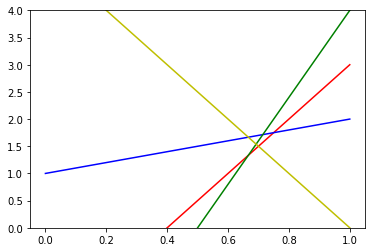

In [6]:
p = np.linspace(0,1,200)
plt.plot(p,3*p-2*(1-p), 'r', p, 2*p+(1-p), 'b', p, 4*p-4*(1-p), 'g', p, 5*(1-p), 'y')
plt.ylim(0,4,1)

The drawing indicates that the peak of the lower envelope occurs at the intersection of the red and yellow lines, or by solving the game involving only columns 1 and 4. This means

$$\begin{pmatrix} 3 &0 \\ -2 & 5 \end{pmatrix}$$ is the matrix to solve.

In [7]:
A=[[3,0],[-2,5]]
solve_2x2(A)


Optimal probability player I choses row 1: 0.7
Optimal probability player II choses row 2: 0.5
Value of [[3, 0], [-2, 5]]: 1.5


We test:

In [8]:
p=.7
print(3*p-2*(1-p))
print(2*p+(1-p))
print(4*p-4*(1-p))
print(5*(1-p))

1.4999999999999996
1.7
1.5999999999999996
1.5000000000000002


So that I's is guaranteed at least 1.50.

On the other hand, the average winnings of II are given by

In [9]:
p=.5
print(-3*p)
print(2*p-5*(1-p))

-1.5
-1.5


so that the maximum winnings are 1.5 in either case. Hence, the solution is correct.

For the next matrix, we have that $3/8*C_1+5/8*C_2 \leq C_3$. Thus column 3 is dominated and we have $$\begin{pmatrix}0 & 8 \\ 8 & 4 \\ 12 & -4 \end{pmatrix}$$

If $p$ is the probability that player II plays column 1, we see the payoff functions as'
$$
\begin{align*}
P_1 &= 8*(1-p)\\
P_2 &= 8*p+4*(1-p)\\
P_3 &= 12*p-4*(1-p)
\end{align*}
$$
Graphing gives

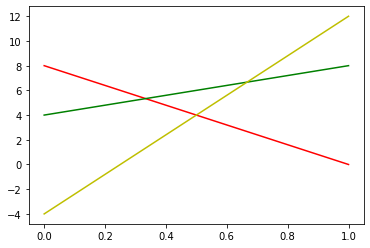

In [10]:
p = np.linspace(0,1,200)
plt.plot(p,8*(1-p),'r', p, 8*p+4*(1-p), 'g', p, 12*p-4*(1-p), 'y')

The probability that minimizes the upper envelope appears to be at the intersection of the green and red lines, corresponding to the first to rows. The matrix becomes:

$$\begin{pmatrix}
0 & 8 \\ 8 & 4 \end{pmatrix}$$

whose solution is given by:

In [11]:
solve_2x2([[0,8],[8,4]])

Optimal probability player I choses row 1: 0.3333333333333333
Optimal probability player II choses row 2: 0.3333333333333333
Value of [[0, 8], [8, 4]]: 5.333333333333333


Corresponding to a strategy of (1/3,2/3,0) for each player.

### 7.) In general, the sure-fire test may be stated thus: For a given game, conjectured optimal strategies $(p_1,\ldots, p_m)$ and $(q_1, \ldots, q_n)$ are indeed optimal if the minimum of I's average payoffs using $(p_1, \ldots, p_m)$ is equal to the maximum of II's average payoffs using $(q_1,\ldots,q_n)$. Show that for the game with the following matrix the mixed strategies $p=(6/37,20/37,0,11/37)$ and $q=(14/37,4/37,0,19/37,0)$ are optimal for I and II respectively. What is the value?

$$A= \begin{pmatrix} 5 & 8 & 3 & 1 & 6 \\ 4 & 2 & 6 & 3 & 5 \\ 2 & 4 & 6 & 4 & 1 \\ 1 & 3 & 2 & 5 & 3 \end{pmatrix}$$

Suppose that player I plays with strategy $p$, and player II plays column $j$. Denote the columns of $A$ as $v_j$. The payoff is

$$pay(p,c_j) = p^Tv_j.$$

Similarly, if player I plays row $j$ and player II plays with strategy $q$, with the rows of $A$ denoted as $r_i$, then the payoff is

$$pay(r_i,q) = -r_iq^T.$$

In general we can say:

In [66]:
A = np.array([[5,8,3,1,6],[4,2,6,3,5],[2,4,6,4,1],[1,3,2,5,3]])
p = np.array([6/37,20/37,0,11/37])
q = np.array([14/37,4/37,0,19/37,0])

def payoffs_player_I(A, p):
    """Returns a list of average payoffs of the game with matrix A
    when player I plays with strategy $p$ and player II plays a single column.
    The indices of the list correspond to the column played by II; i.e.,
   
       payoffs[0] = 1.5
       
    means that the average payoff when player I plays p and player II plays the first
    coulmn is 1.5"""
    payoffs = []
    for col in A.transpose():
        payoffs.append(np.matmul(p.transpose(), col))
    return payoffs

def payoffs_player_II(A,q):
    """Returns a list of average payoffs of the game with matrix A
    when player II plays with strategy $q$ and player I plays a single row.
    The indices of the list correspond to the row played by I; i.e.,
   
       payoffs[0] = 1.5
       
    means that the average payoff when player II plays q and player I plays the first
    row is 1.5"""
    payoffs = []
    for row in A:
        payoffs.append(1*np.matmul(row,q.transpose()))
    return payoffs



In [67]:
payoffs_player_I(A,p)

[3.2702702702702706,
 3.27027027027027,
 4.324324324324325,
 3.27027027027027,
 4.5675675675675675]

In [68]:
payoffs_player_II(A,q)

[3.2702702702702706, 3.27027027027027, 3.243243243243243, 3.27027027027027]

Thus the value of the game is $\approx 3.\overline{270}$.

----------

### A magic square is an $n \times n$ array of the first $n^2$ integers with the property that all row and column sums are equal. Show how to solve all games with magic square game matrices. Solve the example,
$$ A= \begin{pmatrix} 16 & 3 & 2 & 13\\ 5 & 10 & 11 & 8 \\ 9 & 6 & 7 & 12\\ 4 & 15 & 14 & 1 \end{pmatrix}$$

The total sum of the first $n^2$ integers is given by Gauss as 

$$\frac{n^2(n^2+1)}{2}.$$

Hence, for each row and column to have the same sum, each must sum to exactly

$$\frac{n^2(n^2+1)}{2n} = \frac{n^3+n}{2}$$

The average payoff where player I  plays each row with equal probability is

$$\frac{a_{1,j}}{n} + \frac{a_{2,j}}{n} + \ldots + \frac{a_{n,j}}{n}=\frac{n^3+n}{2n} = \frac{n^2+1}{2}$$ regardless of the column player 2 plays. A similar calculation holds for player II, and shows this strategy is optimal and the value of the game is $\frac{n^2+1}{2}.$

Calculating verifies:

In [50]:
A = np.array([[16,3,2,13],[5,10,11,8],[9,6,7,12],[4,15,14,1]])
p = np.array([1/4,1/4,1/4,1/4])
q = np.array([1/4,1/4,1/4,1/4])

In [56]:
min(payoffs_player_I(A,p))

8.5

In [57]:
max(payoffs_player_II(A,q))

8.5

In [63]:
(4*4+1)/2

8.5